# Import Resources

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import json

# Load the Dataset

In [2]:
dataset, datainfo = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

In [3]:
train_set = dataset['train']
test_set = dataset['test']
validation_set = dataset['validation']

# Explore the Dataset

In [4]:
# Get the number of examples in each set from the dataset info

num_examples_train = datainfo.splits['train'].num_examples
num_examples_test = datainfo.splits['test'].num_examples
num_examples_validation = datainfo.splits['validation'].num_examples

print("The number of examples in train dataset: {}".format(num_examples_train))
print("The number of examples in test dataset: {}".format(num_examples_test))
print("The number of examples in validation dataset: {}".format(num_examples_validation))

The number of examples in train dataset: 1020
The number of examples in test dataset: 6149
The number of examples in validation dataset: 1020


In [5]:
# Get the number of classes in the dataset from the dataset info.

datainfo.features['label'].num_classes

102

In [6]:
for image, label in train_set.take(3):
    print('The images in the training set have:')
    print('\u2022 shape:', image.shape)
  
    print('\nThe label of the image:')
    print('\u2022 ', label)
    
    print("***************************************")

The images in the training set have:
• shape: (500, 667, 3)

The label of the image:
•  tf.Tensor(72, shape=(), dtype=int64)
***************************************
The images in the training set have:
• shape: (500, 666, 3)

The label of the image:
•  tf.Tensor(84, shape=(), dtype=int64)
***************************************
The images in the training set have:
• shape: (670, 500, 3)

The label of the image:
•  tf.Tensor(70, shape=(), dtype=int64)
***************************************


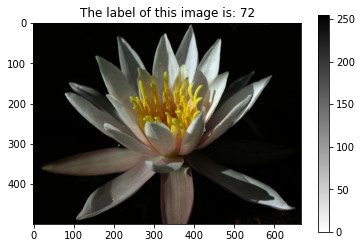

In [7]:
for image, label in train_set.take(1):
    image = image.numpy().squeeze()
    label = label.numpy()
    
# Plot the image
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.title('The label of this image is: {}'.format(label))
plt.show()

In [8]:
with open('../label_map.json', 'r') as f:
    class_names = json.load(f)

In [9]:
IMG_WIDTH=224
IMG_HEIGHT=224

def process_image(image, label):
    
    print(image.shape)
    
    image = tf.cast(image, tf.float32)
    
    image = tf.image.resize(image, [IMG_WIDTH, IMG_HEIGHT])

    image /= 255
    
    print(image.shape)
    
    return image, label

batch_size = 64

train_set = train_set.map(process_image)

train_batches = train_set.shuffle(num_examples_train).batch(batch_size).prefetch(1)

(None, None, 3)
(224, 224, 3)


In [10]:
train_batches

<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>

In [11]:
for image_batch, label_batch in train_batches.take(1):
    print('The images in each batch have:')
    print('\u2022 dtype:', image_batch.dtype) 
    print('\u2022 shape:', image_batch.shape)
  
    print('\nThere are a total of {} image labels in this batch:'.format(label_batch.numpy().size))
    print(label_batch.numpy())

The images in each batch have:
• dtype: <dtype: 'float32'>
• shape: (64, 224, 224, 3)

There are a total of 64 image labels in this batch:
[ 41  21  77 100  22 100  35   3  94  13  78  24  87  70  46  81   6  93
  41  76  48  42  17  27  34  13  74  81  53  18  26  41  43  95  26  52
  16  80  44  12  29  52  74  25  29  29  85  56  37   1  19   8  76  13
   5  81  14  30  93  55  58  68  16  44]
